# RQ2: What are the time slots with more passengers?

In the next lines we are going to analyze the data about the movements of yellow taxis around New York. In particular we are interested in when peoples take more cabs. To do that we are going to upload our data and count how many passengers there are for each different time slot. Finally we are going to visualize this data, both for the whole city and for each borough.

We import the python libraries and the costume functions, defined in another file, that we will need for our analysis.

In [1]:
import matplotlib.pyplot
import RQ2_functions

We build a dictonary contaning as keys the name of the boroughs and as values a list of the IDs associated, as seen in the reference file.

In [2]:
boroughs = RQ2_functions.boroughsIdentifyer()

The next function we are going to call will give as output a dictonary and a data frame. They will contain how many trips there are for each time slot. As time slots we decided to use:
-  From 6AM to 10AM: People going to work
-  From 10AM to 12AM: Working hours
-  From 12AM to 15PM: Lunch period
-  From 15PM to 17PM: Working hours
-  From 17PM to 22PM: Dinning period
-  From 22PM to 6AM: Night

The dictonary has the total trip for time slot for the whole city, data frame has them divided by borough. We count the trips as the number of taxi picking up a passenger in Manhattan.

In [3]:
time, time_borough = RQ2_functions.time_slotter(boroughs)

We shall first of all print them as simple tables, to give a look at them.

In [4]:
for item in time.keys():
     print(item.rjust(5), str(time[item]).rjust(20))
time_borough

 6-10              9632329
10-12              5362186
12-15              8617655
15-17              5818869
17-22             15706105
 22-6              8784878


,EWR,Queens,Bronx,Manhattan,Staten Island,Brooklyn
6-10,609,538165,13428,8821911,134,116040
10-12,376,297097,4876,4937470,67,39428
12-15,1025,562206,7529,7836450,97,67269
15-17,652,419218,5239,5246959,69,47720
17-22,695,982309,10165,14273451,152,187171
22-6,497,558968,14572,7840196,296,225450


Now we shall do some effort to visualize the data. We are going to plot them in two histograms with as x-axis the time slots and y-axis the number of trips.

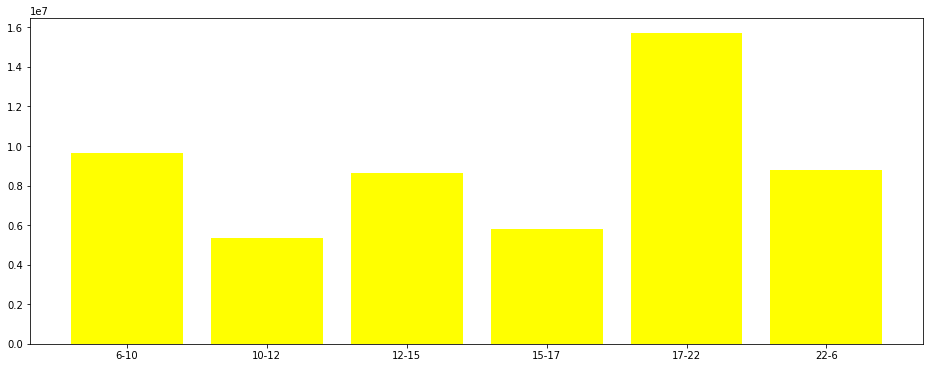

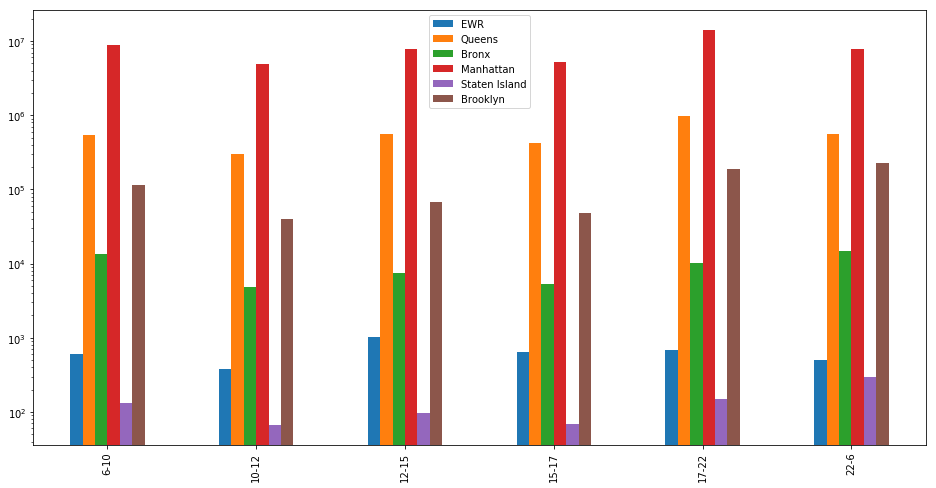

In [5]:
matplotlib.rcParams['figure.figsize'] = (16,6)

matplotlib.pyplot.show(matplotlib.pyplot.bar(time.keys(), time.values(), color='yellow'))

matplotlib.pyplot.show(time_borough.loc[:,[borough for borough in boroughs.keys()]].iloc[:].plot(kind='bar', logy = True, figsize = (16,8)))

We decided to put the second graph in a logarithimc scale. The yellow cab company operates mainly in Manhattan, so the amaunt of trips there is a lot larger. Putting the data in a loharithmic scale allow us to have comprensieble plot.

As we said the trip departing from Manhattan are largely more than the one from other places, therefore the graph for the whole city is more or less the same as the one for Manhattan.

On the second graph we can see the different boroughs. It is particularly interesting to notice that the airport (EWR) does not follow the general tendecies. That is quite intuitive, but our analisys back up this intuition quite nicely.

Let us now visualize the data not by the time slots, but by the boroughs to have a better understanding of what is going on.

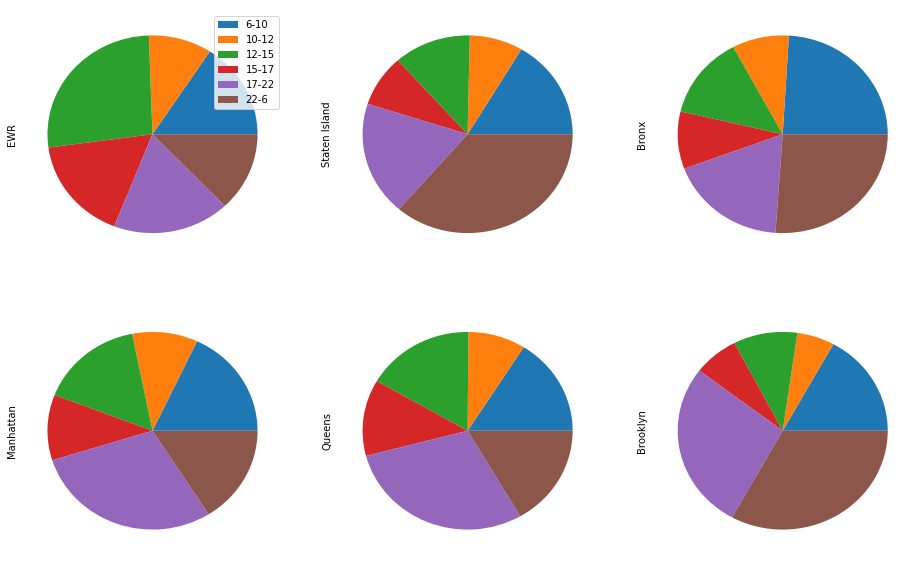

In [7]:
fig, axes = matplotlib.pyplot.subplots(nrows=2, ncols=3, figsize = (16,10))
c = 0
for borough in boroughs:
    time_borough.plot(kind = 'pie', y=borough, ax = axes[c % 2, c % 3], labels = None, legend = (c == 0))
    c+=1

For a moment don't consider EWR that is, as we already said, quite different from the other boroughs. We can see that the boroughs are quite similar but for the distribution of the 17-22 and 22-6 time slots.